In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score

## What we want to do ? 
The columns in the dataset refer to different measurements and calculations for the "B-S(ex.K,O) private sector, excluding financial and insurance services", which is an industrial sector. These measurements and calculations can be used for a variety of economic analyzes and time series analyses. 
#
Annual Development Forecast: By analyzing the relationships between the annual development indicator and other economic factors, we can investigate which factors affect annual development the most. This can be important for annual performance forecasts. In this project, we used 3 machine learning models to compare the results.
GradientBoostingRegressor, RandomForestRegressor and SVR model.

## note:
As you said in the introductory course, we chose the Python language because we can use any programming language we want. That's why there were R examples in the exercises, but we tried to write them in Python language. We created our notebook thinking that the codes we wrote could help us make trend analysis predictions with machine learning in the future.
the environment i used "myenv" is my main environment. i downloaded many packages to it, some of them i did not used it but i downloaded. I use "myenv" for every lecture. 

In [2]:
df = pd.read_csv('productionvalue.csv')
df.head(10)

,month,"B-S(ex.K,O) private sector excluding financial and insurance services Constant prices","B-S(ex.K,O) private sector excluding financial and insurance services Current prices","B-S(ex.K,O) private sector excluding financial and insurance services Calendar adjusted, constant prices","B-S(ex.K,O) private sector excluding financial and insurance services Seasonally adjusted, calender adjusted, constant prices","B-S(ex.K,O) private sector excluding financial and insurance services Trend","B-S(ex.K,O) private sector excluding financial and insurance services Monthly development, seasonally adjusted, calendar adjusted","B-S(ex.K,O) private sector excluding financial and insurance services Annual development, calendar adjusted"
0,2010M01,65.9,..,68.0,72.9,73.1,..,..
1,2010M02,67.3,..,67.5,72.0,73.5,-1.2,..
2,2010M03,78.2,..,76.6,73.7,73.9,2.4,..
3,2010M04,75.3,..,75.2,74.8,74.4,1.5,..
4,2010M05,75.6,..,75.9,74.7,74.9,-0.1,..
5,2010M06,80.8,..,79.1,75.5,75.5,1.1,..
6,2010M07,65.9,..,65.9,77.2,76.0,2.3,..
7,2010M08,70.3,..,70.4,76.1,76.5,-1.4,..
8,2010M09,80.4,..,79.7,77.1,77.0,1.3,..
9,2010M10,81.2,..,82.8,77.6,77.4,0.6,..


In [3]:
#it is better to edit the month column.
df['month'] = pd.to_datetime(df['month'].str.replace('M', '-'), format='%Y-%m')
df

,month,"B-S(ex.K,O) private sector excluding financial and insurance services Constant prices","B-S(ex.K,O) private sector excluding financial and insurance services Current prices","B-S(ex.K,O) private sector excluding financial and insurance services Calendar adjusted, constant prices","B-S(ex.K,O) private sector excluding financial and insurance services Seasonally adjusted, calender adjusted, constant prices","B-S(ex.K,O) private sector excluding financial and insurance services Trend","B-S(ex.K,O) private sector excluding financial and insurance services Monthly development, seasonally adjusted, calendar adjusted","B-S(ex.K,O) private sector excluding financial and insurance services Annual development, calendar adjusted"
0,2010-01-01,65.9,..,68.0,72.9,73.1,..,..
1,2010-02-01,67.3,..,67.5,72.0,73.5,-1.2,..
2,2010-03-01,78.2,..,76.6,73.7,73.9,2.4,..
3,2010-04-01,75.3,..,75.2,74.8,74.4,1.5,..
4,2010-05-01,75.6,..,75.9,74.7,74.9,-0.1,..
...,...,...,...,...,...,...,...,...
164,2023-09-01,103.9,121.1,104.6,102.1,101.8,0.1,-1.8
165,2023-10-01,109.1,126.3,109.3,102.0,102.0,-0.1,-1.5
166,2023-11-01,108.7,125.2,107.6,101.7,102.1,-0.3,-0.6
167,2023-12-01,114.1,130.4,114.7,102.7,102.3,1.0,0.7


In [4]:
# Cheking if the dataset has missing values, actually it has missing values but columns with missing data are expressed as "..".It is important to correctly convert ".." to NaN (Not a Number) values. 
#We then filled in these missing values ​​with mean values.
df = df.replace('..', np.nan)
for col in df.columns:
    if df[col].dtype == object:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [5]:
for col in df.columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)
df.head(10) ## we do not have missing values anymore

,month,"B-S(ex.K,O) private sector excluding financial and insurance services Constant prices","B-S(ex.K,O) private sector excluding financial and insurance services Current prices","B-S(ex.K,O) private sector excluding financial and insurance services Calendar adjusted, constant prices","B-S(ex.K,O) private sector excluding financial and insurance services Seasonally adjusted, calender adjusted, constant prices","B-S(ex.K,O) private sector excluding financial and insurance services Trend","B-S(ex.K,O) private sector excluding financial and insurance services Monthly development, seasonally adjusted, calendar adjusted","B-S(ex.K,O) private sector excluding financial and insurance services Annual development, calendar adjusted"
0,2010-01-01,65.9,94.311927,68.0,72.9,73.1,0.214286,2.412102
1,2010-02-01,67.3,94.311927,67.5,72.0,73.5,-1.200000,2.412102
2,2010-03-01,78.2,94.311927,76.6,73.7,73.9,2.400000,2.412102
3,2010-04-01,75.3,94.311927,75.2,74.8,74.4,1.500000,2.412102
4,2010-05-01,75.6,94.311927,75.9,74.7,74.9,-0.100000,2.412102
5,2010-06-01,80.8,94.311927,79.1,75.5,75.5,1.100000,2.412102
6,2010-07-01,65.9,94.311927,65.9,77.2,76.0,2.300000,2.412102
7,2010-08-01,70.3,94.311927,70.4,76.1,76.5,-1.400000,2.412102
8,2010-09-01,80.4,94.311927,79.7,77.1,77.0,1.300000,2.412102
9,2010-10-01,81.2,94.311927,82.8,77.6,77.4,0.600000,2.412102


In [6]:
# Converting 'month' column to datetime and extracting year/month information
df['month'] = pd.to_datetime(df['month'])
df['year'] = df['month'].dt.year
df['month_num'] = df['month'].dt.month

df.head(5)

,month,"B-S(ex.K,O) private sector excluding financial and insurance services Constant prices","B-S(ex.K,O) private sector excluding financial and insurance services Current prices","B-S(ex.K,O) private sector excluding financial and insurance services Calendar adjusted, constant prices","B-S(ex.K,O) private sector excluding financial and insurance services Seasonally adjusted, calender adjusted, constant prices","B-S(ex.K,O) private sector excluding financial and insurance services Trend","B-S(ex.K,O) private sector excluding financial and insurance services Monthly development, seasonally adjusted, calendar adjusted","B-S(ex.K,O) private sector excluding financial and insurance services Annual development, calendar adjusted",year,month_num
0,2010-01-01,65.9,94.311927,68.0,72.9,73.1,0.214286,2.412102,2010,1
1,2010-02-01,67.3,94.311927,67.5,72.0,73.5,-1.200000,2.412102,2010,2
2,2010-03-01,78.2,94.311927,76.6,73.7,73.9,2.400000,2.412102,2010,3
3,2010-04-01,75.3,94.311927,75.2,74.8,74.4,1.500000,2.412102,2010,4
4,2010-05-01,75.6,94.311927,75.9,74.7,74.9,-0.100000,2.412102,2010,5


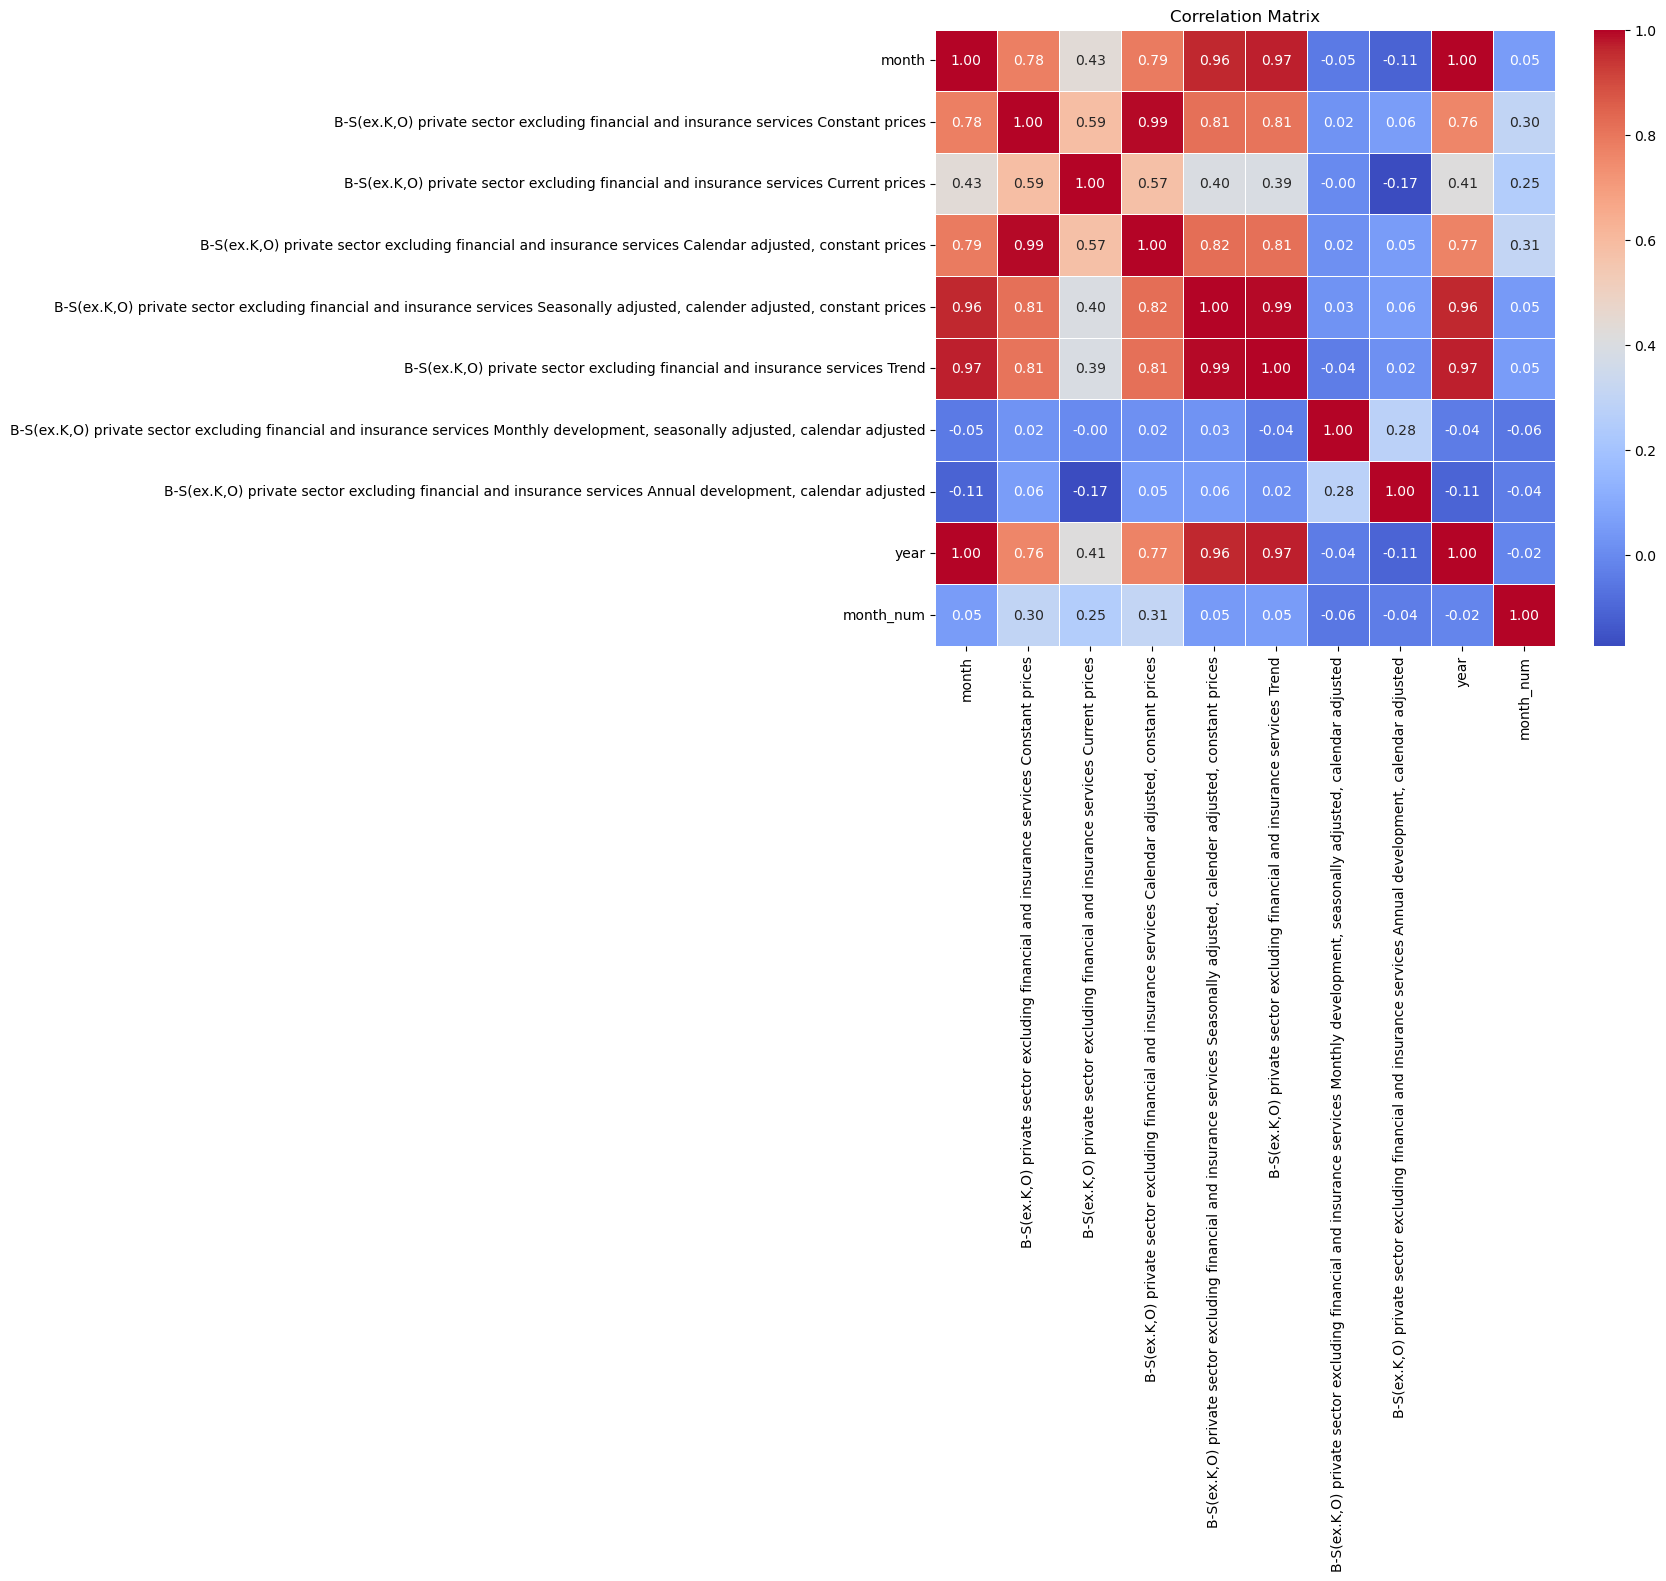

In [7]:
## We created a correlation matrix to understand which traits have a strong relationship with annual growth.
correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [8]:
#lets change the column names as they are way too long
df.columns = [
    'month',
    'Constant_Prices',
    'Current_Prices',
    'Calendar_Adjusted_Prices',
    'Seasonally_Adjusted_Prices',
    'Trend',
    'Monthly_Development',
    'Annual_Development',
    'year',
    'month_num'
]
df.columns

Index(['month', 'Constant_Prices', 'Current_Prices',
       'Calendar_Adjusted_Prices', 'Seasonally_Adjusted_Prices', 'Trend',
       'Monthly_Development', 'Annual_Development', 'year', 'month_num'],
      dtype='object')

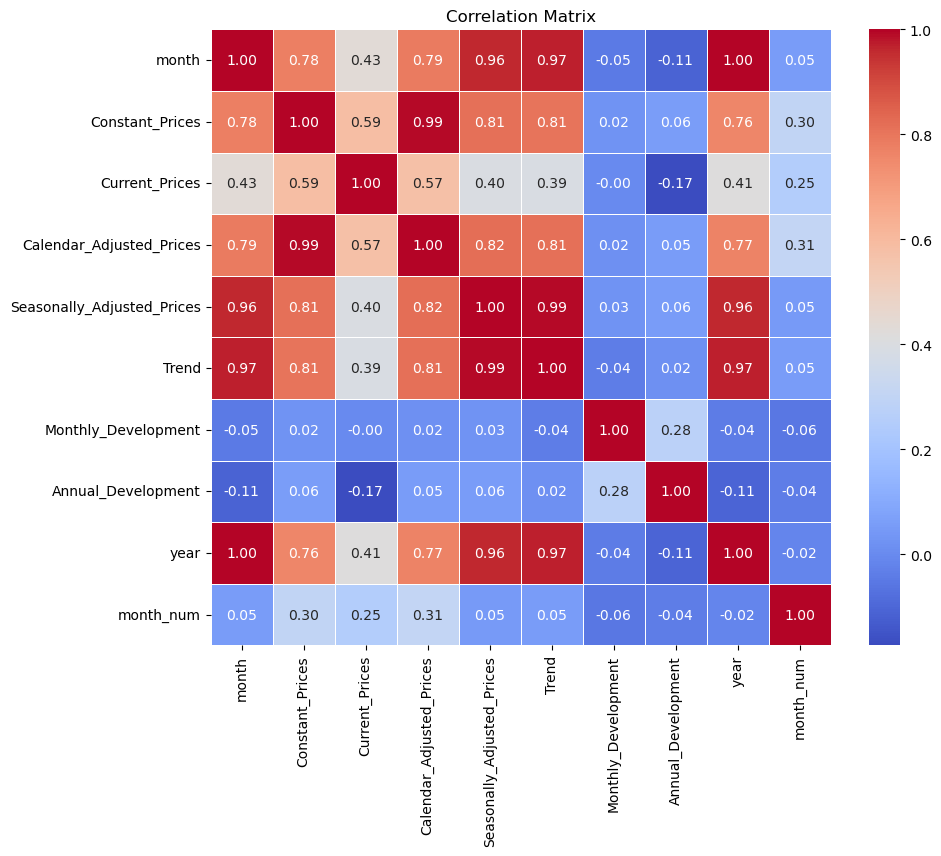

In [9]:
## We created a correlation matrix to understand which traits have a strong relationship with annual growth.
correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Independent variables and the dependent variable
X = df[['Calendar_Adjusted_Prices','Current_Prices','Constant_Prices', 'Seasonally_Adjusted_Prices', 'Trend', 'Monthly_Development','year', 'month_num']]
y = df['Annual_Development'] #target

In [11]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Creating and training the SVR model
model = SVR(C=1.0, kernel="linear")
model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [14]:
# Predicting the test set results
y_pred = model.predict(X_test_scaled)

In [15]:
# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 12.160452101873952
R^2 Score: 0.020962141678130597


In [16]:
scores = cross_val_score(model, X, y, cv=10)
scores.mean()

-0.9440162483860357

In [17]:
from sklearn.pipeline import Pipeline
# Pipeline for scaling and SVR
pipe = Pipeline([
    ('scaler', StandardScaler()),  # It's important to scale features for SVR
    ('svr', SVR())
])

In [18]:
# Parameter grid to search
param_grid = {
    'svr__C': [0.1, 1, 10, 100],  # Example regularization values
    'svr__kernel': ['linear', 'rbf', 'poly'],  # Different types of kernels
    'svr__gamma': ['scale', 'auto', 0.1, 1]  # Gamma values, if applicable
}

In [19]:
# Setup the grid search
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

In [20]:
# Fitting grid search
grid_search.fit(X_train, y_train)
# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated MSE: ", -grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found:  {'svr__C': 10, 'svr__gamma': 0.1, 'svr__kernel': 'rbf'}
Best cross-validated MSE:  8.1344547886675


In [21]:
# Evaluate on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE: ", mse)
print("Test R^2 Score: ", r2)

Test MSE:  11.081065128445978
Test R^2 Score:  0.10786357444662109


In [22]:
from sklearn.ensemble import RandomForestRegressor

# Assuming data is already split and scaled
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R^2:", r2_score(y_test, y_pred_rf))

Random Forest MSE: 10.375131738390532
Random Forest R^2: 0.16469826352954375


In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming data is already split and scaled
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train_scaled, y_train)
y_pred_gbm = gbm_model.predict(X_test_scaled)

# Evaluate the GBM model using regression metrics
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

print("Gradient Boosting Machine MSE:", mse_gbm)
print("Gradient Boosting Machine R^2 Score:", r2_gbm)

Gradient Boosting Machine MSE: 8.060279099903404
Gradient Boosting Machine R^2 Score: 0.3510670227277253
